# Анализ гипотез для увеличения выручки интернет-магазина

## Вводные данные

Заказчиком исследования выступает интернет-магазин. Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки. 

**Цели исследования:**

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Данные и описание их содержания предоставлены заказчиком. О качестве данных ничего не известно.

### Планы исследования

**Часть 1. Приоритизация гипотез**

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

Проанализировать A/B-тест. Подготовить выводы и предположение по следующим пунктам:
1. Построить график кумулятивной выручки по группам.
2. Построить график кумулятивного среднего чека по группам. 
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
4. Построить график кумулятивной конверсии по группам. 
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. 
6. Построить точечный график количества заказов по пользователям. 
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. 
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. 
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14. Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Загрузка и подготовка данных к анализу

Загрузим необходимые библиотеки и переданные нам датасеты

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math
import collections
import datetime as dt
from cycler import cycler
from scipy import stats as st
from IPython.display import display, HTML
import warnings


#введем некотрые настройки
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 400)

#Подключим файлы с данными 

try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')


файл с данными подключен
файл с данными подключен
файл с данными подключен


Согласно описанию данных предоставленому заказчиком:
    
Датасет hypothesis.csv содержит:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Датасет orders.csv содержит:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет visitors.csv содержит:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Проверим полученные данные

In [2]:
print('Таблица hypothesis (информация о рассматриваемых гипотезах)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
hypothesis.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(hypothesis.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
hypothesis.sample(5, random_state=1)

Таблица hypothesis (информация о рассматриваемых гипотезах)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
 
Описание данных
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000
 
Случайная выборка данных


,Hypothesis,Reach,Impact,Confidence,Efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


In [3]:
print('Таблица orders (информация о заказах)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
orders.info()

#Просмотрим данные функцией describle
print (' ')
print ('Описание данных')
print(orders.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print (' ')
print ('Случайная выборка данных')
orders.sample(10, random_state=1)

Таблица orders (информация о заказах)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
 
Описание данных
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e+09  2.978000e+03
75%     3.237740e+09  3.177606e+09  8.290000e+03
max     4.293856e+09  4.283872e+09  1.294500e+06
 
Случайная выборка данных


,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A
311,3567356314,3077396270,2019-08-24,4195,B
866,707525727,1270030113,2019-08-30,3290,B
752,237002862,1398592185,2019-08-20,390,A


In [4]:
print('Таблица visitors (информация о пользователях)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
visitors.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(visitors.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
visitors.sample(10, random_state=1)

Таблица visitors (информация о пользователях)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
 
Описание данных
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
 
Случайная выборка данных


,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490
50,2019-08-20,B,560
35,2019-08-05,B,707
44,2019-08-14,B,746


В целом данные чистые. Но в столбце date указан не временной тип. Имеет смысл привести названия столбцов к одному виду и поправить тип данных в колонке date.

In [5]:
# исправим наименование колонок
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

# проверим результат
hypothesis.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Поменяем тип даты и проверим результат.

In [6]:
# поменяем тип даты

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

# проверим результат
visitors.info()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим наличие дубликатов

In [7]:
print('\033[1m' + 'Количество пропусков:' + '\033[0m')
display(orders.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов:' + '\033[0m', 
      orders.duplicated().sum())

Количество пропусков:


transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


Количество явных дубликатов: 0


In [8]:
print('\033[1m' + 'Количество пропусков:' + '\033[0m')
display(visitors.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов:' + '\033[0m', 
      visitors.duplicated().sum())

Количество пропусков:


date        0
group       0
visitors    0
dtype: int64


Количество явных дубликатов: 0


На всякий случай (поскольку для А/В теста это важно) проверим дубликаты пользователей в группах.

In [9]:
print('Дубликаты \'visitorid\': ',orders['visitorid'].duplicated().sum())

Дубликаты 'visitorid':  166


Дубликаты есть. Изучим их подробнее

In [10]:
# составим список дубликатов
dupes = [item for item, count in collections.Counter(orders['visitorid']).items() if count > 1]
print(dupes)
print(len(dupes))

[4069496402, 2742574263, 963407295, 351125977, 3234906277, 199603092, 237748145, 3803269165, 2038680547, 2378935119, 4256040402, 2712142231, 8300375, 249864742, 2096506107, 276558944, 3379260072, 457167155, 2706377257, 611059232, 3062433592, 1738359350, 2458001652, 2716752286, 3967698036, 678354126, 3362039251, 3891541246, 2892265953, 2366521417, 522292794, 1648269707, 3656415546, 3332057097, 2232111114, 2686716486, 2954449915, 2927087541, 3469608676, 2579882178, 3957174400, 2988190573, 2780786433, 3984495233, 3077396270, 818047933, 1668030113, 3717692402, 1772171838, 2044997962, 1959144690, 1294878855, 1404934699, 2587333274, 4109358064, 2397843657, 3202540741, 1333886533, 1404560065, 1637811943, 2600415354, 2744017357, 3951559397, 2108163459, 1617417821, 393266494, 3972127743, 3908431265, 3941503500, 2025197455, 3935952912, 4120364173, 366673373, 4266935830, 1230306981, 1614305549, 759473111, 477780734, 406208401, 1602967004, 1801183820, 4186807279, 3766097110, 3941795274, 471551937,

In [11]:
# изучим дубликаты
orders.query('visitorid in @dupes').sort_values(by='visitorid').head(10)

,transactionid,visitorid,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A
26,2223239646,199603092,2019-08-15,3488,A
246,437656952,199603092,2019-08-02,3488,B
1013,83566152,232979603,2019-08-31,60,A
1009,2670069237,232979603,2019-08-31,2640,B
1097,3357467820,237748145,2019-08-12,340,A


In [12]:
# из списка общих дубликатов сформируем список дубликатов, присутствующих в обеих группах
double_group_dupes = []
for i in dupes:
    if len(set(orders.query('visitorid == @i')['group'])) > 1:
        double_group_dupes.append(i)
len(double_group_dupes)

58

In [13]:
print('Количество наблюдений в датасете orders до очистки:', len(orders))
print(
    'Количество наблюдений в датасете orders уменьшится на:',
    len(orders)
    -len(orders.query('visitorid not in @double_group_dupes'))
    )
print('и после очистки составит:', len(orders.query('visitorid not in @double_group_dupes')))

Количество наблюдений в датасете orders до очистки: 1197
Количество наблюдений в датасете orders уменьшится на: 181
и после очистки составит: 1016


Дубликатов более 10% и они могут внести погрешность в решение. Думаю, я их удалю.

In [14]:
orders = orders.query('visitorid not in @double_group_dupes')

# проверим результат
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### Выводы

Данные в целом хорошо отобраны. Мы исправили тип данных в столбце date, нашли и почистили дубликаты в пользователях и привели названия столбцов к одному виду. Данные готовы к анализу

## Приоритизация гипотез

Датасет hypothesis содержит ранее выдвинутые гипотезы по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort, нам необходимо расставить приоритеты и сравнить как приоретизация зависит от применяемого фреймворка


Рассмотрим предоставленные нам данные

In [15]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Приоритизация по ICE

**ICE** (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач

$$ICE = \frac{Impact * Confidence}{Efforts}$$

данный фреймворк состоит из следующих компонент:

**Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

**Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;

**Efforts** — сколько стоит протестировать эту гипотезу.

In [16]:
# расчитаем ICE и добавим оценку в таблицу
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# выведем на экран
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Точно видны самые приоритетные гипотезы, можно утверждать, что 8,0,7 гипотезы отчетливо более приоритетны

### Приоритизация по RICE

Фреймворк **RICE** является модификацией ICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

и добавляет компоненту

**Rearch** — скольких пользователей затронет изменение, которое вы хотите внести;

In [17]:
# расчитаем RICE и добавим оценку в таблицу
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# выведем на экран
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Отчетливо виден лидер, это гипотеза 7, также выделяются и сильно гипотезы 2, 0 и 6. Остальные сильно им уступают

### Анализ гипотез по ICE и RICE

Изучим топ-3 гипотез по разным фреймворкам.

In [18]:
# выведем топ-3 по разным фреймворкам
display(hypothesis.sort_values(by='ICE', ascending=False).head(3).style.set_caption('ТОП-3 ГИПОТЕЗ ПО ФРЕЙМВОРКУ ICE'))
display(hypothesis.sort_values(by='RICE', ascending=False).head(3).style.set_caption('ТОП-3 ГИПОТЕЗ ПО ФРЕЙМВОРКУ RICE'))

# выведем гипотезы по охвату
display(hypothesis.sort_values(by='reach', ascending=False).style.set_caption('ГИПОТЕЗЫ ПО ПАРАМЕТРУ REACH (Охват)'))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33333,4
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


### Выводы

В целом фреймворк ICE и его модификация RICE дают похожие результаты. Введение параметра Reach (Охват) только несколько корректирует результаты и делает приоретизацию гипотезы более явной. На мой взгляд основное влияние на результат даёт регулировка параметра Efforts (стоимость теста). Это отчетливо видно на примере сравнения гипотезы 4 и 5 когда имеющая более слабые оценки гипотеза 4 имеет сравнимую приоритетность только потому, что её проверка будет стоить сильно дешевле.

В целом я бы рекомендовал сосредоточиться на всех гипотезах входящих в топ 3 и ICE и RICE. Гипотеза 8, которая не вошла в топ три по RICE имеет самый высокий уровень Confidence и сработает почти наверняка, несмотря на то, что охватит небольшую часть пользователей. 

## Анализ А/В-теста

Проанализировать A/B-тест. Подготовить выводы и предположение по следующим пунктам:
1. Построить график кумулятивной выручки по группам.
2. Построить график кумулятивного среднего чека по группам. 
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
4. Построить график кумулятивной конверсии по группам. 
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. 
6. Построить точечный график количества заказов по пользователям. 
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. 
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. 
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14. Принять решение по результатам теста и объясните его. 
Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Кумулятивная выручка по группам

In [19]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group']
    )]
    .agg(
        {'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique,
          'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}
    ), 
    axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )]
    .agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
    ),
    axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], 
    right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# проверим результат
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [20]:
# зададим стандартные параметры для графиков
plt.rcParams.update({'figure.figsize': (15,8)})
sns.set()

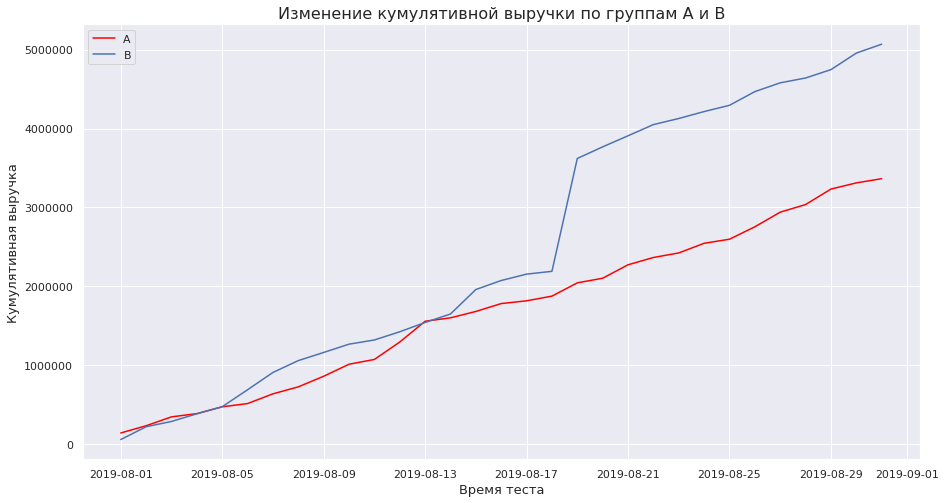

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='red')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# настроим отображение
plt.legend()
plt.title('Изменение кумулятивной выручки по группам А и В', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивная выручка', fontsize=13)
plt.show()

**Итоги:**

Во время теста выручка увеличивается у обеих групп. Однако 18 августа группа В демонстрирует резкий скачок вверх. Это может быть связано либо с всплеском активности, либо с появлением в выборке крайне больших заказов, что проанализируем позднее.

### Кумулятивный средний чек по группам

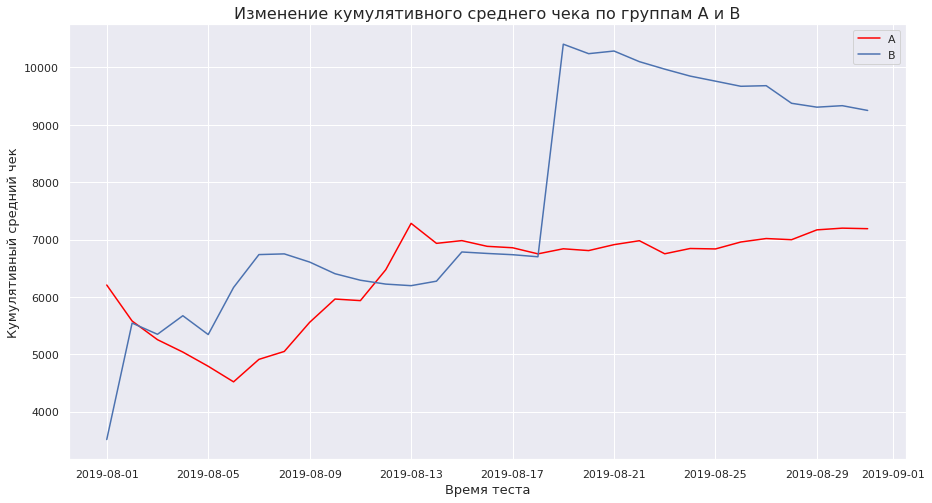

In [22]:
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='red')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# настроим отображение
plt.legend()
plt.title('Изменение кумулятивного среднего чека по группам А и В', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивный средний чек', fontsize=13)
plt.show()

**Итоги:**

Средний чек также испытывает сильное колебание в тех же датах. Кроме того, есть заметные просадки в начале теста. Если гипотеза о попадании в выборку выбросов верна, то для усреднения графика естественным образом необходимо больше времени. Виден резкий скачек 18 августа. В принципе можно было бы посчитать это выбросом, но значительная разница в среднем чеке сохраняется. Возможно 17 августа сработал какой-то неучтенный фактор, который далее стал действовать. Или наконец результаты стабилизировались 

### Относительное изменение кумулятивного среднего чека группы B к группе A

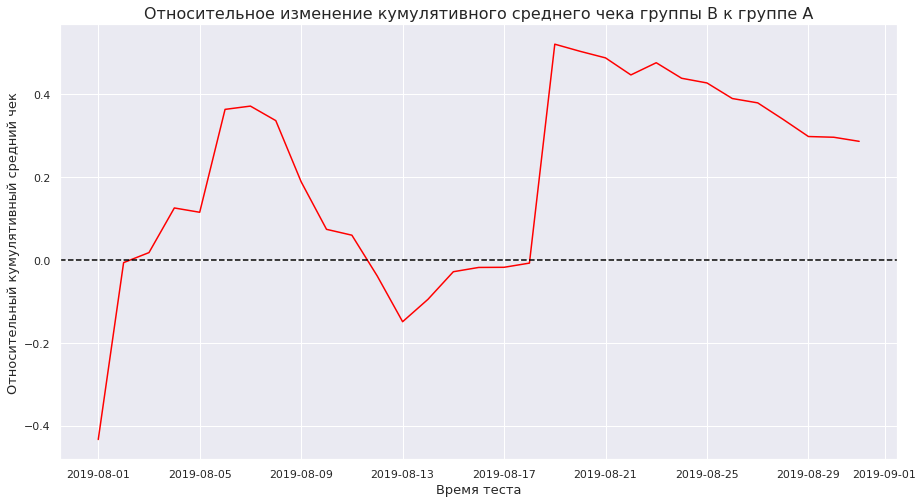

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', 
    right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='red')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# настроим отображение
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Относительный кумулятивный средний чек', fontsize=13)
plt.show()

**Итоги:**

Несмотря на общую положительную динамику, изменение сильно скачет. А значит в выборке обнаружены выбросы, которые необходимо очистить, перед окончательными выводами.

### Кумулятивная конверсия по группам

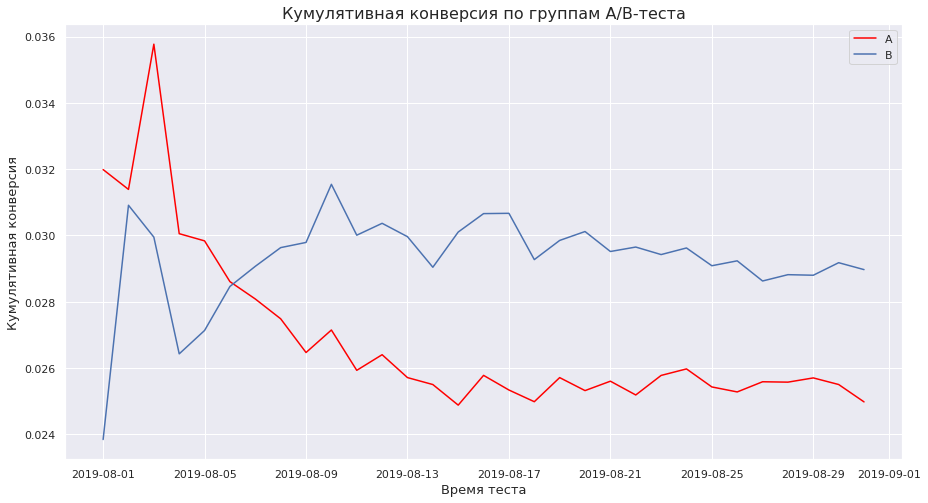

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='red')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# настроим отображение
plt.title('Кумулятивная конверсия по группам А/В-теста', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивная конверсия', fontsize=13)
plt.show()

**Итоги:**

После резкого скачка (вниз для группы А и вверх для группы В), происходит относительная стабилизация на одном уровне. Несмотря на колебания, среднее значение остается одинаковым. Возможно искажения связано с выбросами в датасете. При этом, группа В демонстрирует уверенное превосходство над группой А.

### Относительное изменение кумулятивной конверсии

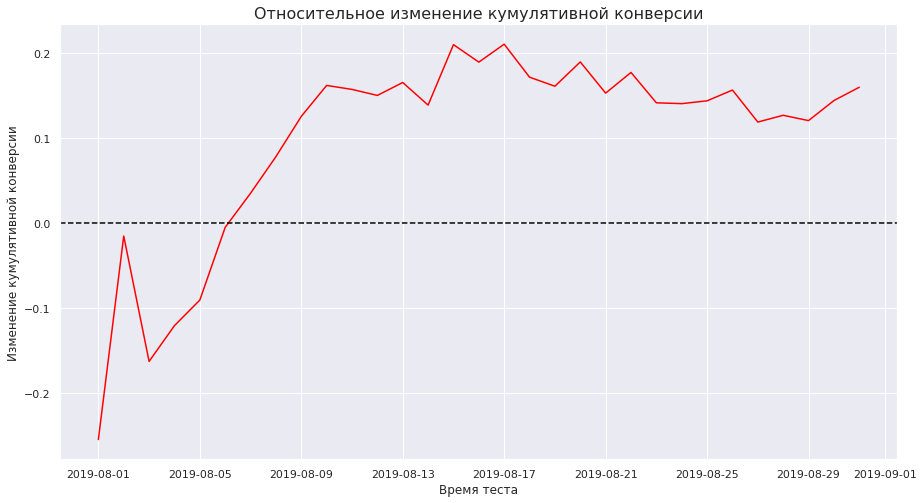

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', 
    right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
    color='red'
    )

# настроим отображение
plt.title('Относительное изменение кумулятивной конверсии', fontsize=16)
plt.xlabel('Время теста')
plt.ylabel('Изменение кумулятивной конверсии')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Итоги:**

В начале теста конверсия группы В проигрывала конверсии группы А. После резкого скачка вверх, она снова откатывается назад, после чего демонстрирует уверенный рост. Визуальный анализ позволяет предварительно предупредить наличие выбросов в группе А в начале теста и в группе В в следующий период.

### Точечный график количества заказов по пользователям

In [26]:
# сформируем два фрейма для графика
# фрейм для группы А
ordersByUsersA = (
    orders.query('group == "A"')
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorid', 'orders']

print(ordersByUsersA.sort_values(by='orders', ascending=False).head(10))

      visitorid  orders
58    611059232       3
211  2108163459       3
310  2988190573       3
409  3908431265       3
416  3967698036       3
302  2892265953       2
374  3469608676       2
72    759473111       2
286  2744017357       2
282  2733145037       2


In [27]:
# фрейм для группы В
ordersByUsersB = (
    orders.query('group == "B"')
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsersB.columns = ['visitorid', 'orders']

print(ordersByUsersB.sort_values(by='orders', ascending=False).head(10))

      visitorid  orders
347  2742574263       3
33    249864742       3
486  3935952912       2
256  2025197455       2
418  3332057097       2
51    406208401       2
507  4134830387       2
250  1985475298       2
296  2366521417       2
421  3362039251       2


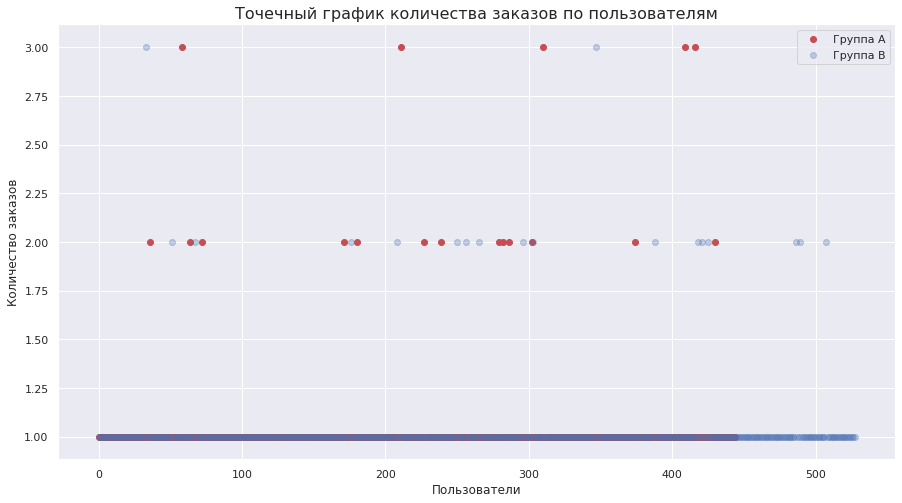

In [28]:
A_values = pd.Series(range(0,len(ordersByUsersA)))
plt.scatter(A_values, ordersByUsersA['orders'], color='r', label='Группа А')
B_values = pd.Series(range(0,len(ordersByUsersB)))
plt.scatter(B_values, ordersByUsersB['orders'], alpha=0.3, label='Группа В')

# настроим отображение
plt.title('Точечный график количества заказов по пользователям', fontsize=16)
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.legend()
plt.show()

**Итоги:**

Подавляющее большинство пользователей совершает 1 заказ. На втором месте достаточно массивная группа, совершающая 2 заказа. 3 и более заказа являются редкостью.

### Перцентили заказов. Аномальные пользователи

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. После чего, выберем границу для определения аномальных пользователей.

In [29]:
# сформируем единый датасет, содержащий сведения по заказам
ordersByUsers = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Итоги:**

Для определенеия аномальных пользователей разумно выбрать пользователей, имеющих 3 и более заказов.

### Точечный график стоимости заказа

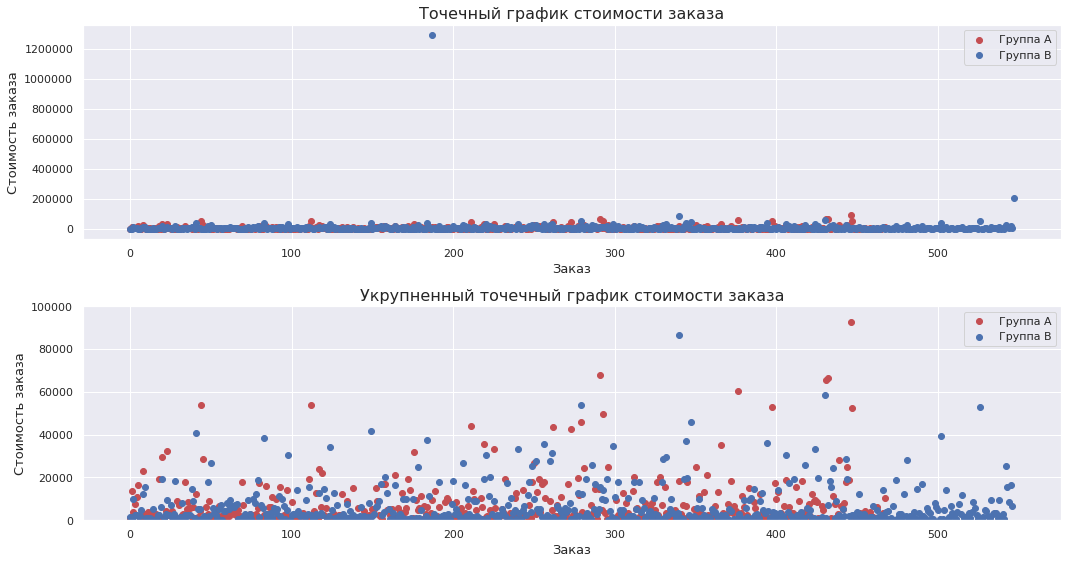

In [30]:
# выделим группу А
A_values = pd.Series(range(0,len(orders.query('group == "A"')['revenue'])))

# первый график
plt.subplot(2, 1, 1)
plt.scatter(A_values, orders.query('group == "A"')['revenue'], color='r', label='Группа А')

# выделим группу В
B_values = pd.Series(range(0,len(orders.query('group == "B"')['revenue'])))
plt.scatter(B_values, orders.query('group == "B"')['revenue'], label='Группа В')


# настроим отображение
plt.title('Точечный график стоимости заказа', fontsize=16)
plt.xlabel('Заказ', fontsize=13)
plt.ylabel('Стоимость заказа', fontsize=13)
plt.legend()

# второй укрупненный график
plt.subplot(2, 1, 2)
plt.scatter(A_values, orders.query('group == "A"')['revenue'], color='r', label='Группа А')
plt.scatter(B_values, orders.query('group == "B"')['revenue'], label='Группа В')

# настроим отображение
plt.ylim(-100, 100000)
plt.title('Укрупненный точечный график стоимости заказа', fontsize=16)
plt.xlabel('Заказ', fontsize=13)
plt.ylabel('Стоимость заказа', fontsize=13)
plt.legend()
plt.tight_layout()

plt.show()

Итоги:

Как и предполагалось, есть значительные выбросы, а также большое количество средних заказов. Чтобы определить пограничные цифры, подсчитаем перцентили.

### Перцентили стоимости заказов. Аномальные заказы

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Итоги:**

95% пользователей осуществляли заказыв на сумму менее 26785. Сумма 53904, характерная для 99% пользователей, значительно выше (больше чем в два раза), чем 95% заказов. Поэтому остановимся на сумме 26785, чтобы определить порог для отсеивания аномальных заказов.

### Формирование гипотез для анализа А/В-теста

Для проведения анализа установим уровень статистической значимости, равный 5% (alpha = 0.05). 

Также, определим гипотезы для проверки.


Гипотезы для конверсии:

$H_0$ Статистически значимых различий в конверсии между группой А и группой В нет.

$H_1$ Статистически значимые различия в конверсии между группой А и группой В есть.


Гипотезы для среднего чека:

$H_0$ Статистически значимых различий в среднем чеке между группой А и группой В нет.

$H_1$ Статистически значимые различия в среднем чеке между группой А и группой В есть.

### Статистическая значимость в конверсии по сырым данным

Посчитаем статистическую значимость без удаления аномальных пользователей, чтобы затем сравнить ее с результатами анализа "очищенных" данных.

Для этого подготовим данные в единый датафрейм.

In [32]:
# создадим фреймы, содержащие посетителей, разбитых по групам
# начнем с группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем кумулятивных посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# повторим процедуру для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# сформируем датафрейм с уникальными заказами для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# посчитаем суммы заказов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# повторим процедуру для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# подготовим итоговый датафрейм для расчетов эффективности А/В-теста
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# проверим результат
display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Для пользователей, сделавших хотя бы один заказ, укажем число совершенных заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# сцепим необходимые данные через метод concat
# для группы А
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders')], axis=0,
)

# для группы В
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders')], axis=0,
)

result = st.mannwhitneyu(sampleA, sampleB,alternative='two-sided')[1]
alpha = 0.05

print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print("Разница в конверсии между группой А и группой В:","{0:.4f}".format(
    (data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())
    /(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-значение:  0.011
Отвергаем нулевую гипотезу
Разница в конверсии между группой А и группой В: 0.1598


**Итоги:**

p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергнуть. 

Преимущество конверсии в группе В составляет 16%.

Следовательно, по «сырым», можно прийти к выводу, что между группами А и В есть различия. А преимущество конверсии в 16% получено не случайным образом.

### Статистическая значимость в среднем чеке по сырым данным

Пересчитаем статистику для среднего чека по сырым данным.

In [34]:
result = st.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'],
    alternative='two-sided'
)[1]
alpha = 0.05

In [35]:
print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print("Разница в среднем чеке между группой А и группой В:",
    '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                     /orders[orders['group']=='A']['revenue'].mean()-1)
)

p-значение:  0.8295
Не получилось отвергнуть нулевую гипотезу
Разница в среднем чеке между группой А и группой В: 0.287


**Итоги:**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но при этом видно значительное преимущество в среднем чеке группы В (на 29%). Налицо противоречие. Надо уточнять результаты на очищенных данных.



### Статистическая значимость в конверсии по очищенным данным

Используем полученные нами ранее данные, чтобы очистить данные от выбросов. 

#### Очистка данных

95% пользователей соответствуют указанным ниже параметрам:
- Допустимое количество заказов на пользователя - 2;
- Допустимая сумма заказа - до 26785.

In [36]:
# узнаем количество аномальных пользователей

# выберем пользователей с количеством заказов 3 и более
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0
)

# выберем пользователей с суммой заказа более 26785
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorid']

# объединим данные в единый фрейм аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

(58,)

**Итоги:**

В массиве присутствует 58 пользователей, признанных нами аномальными. Используя эти данные, очистим датасет от выбросов и пересчитаем статистическую достоверность исследования.

#### Оценка статистического влияния

In [37]:
# подготовим выборки, очищенные от выбросов
# для группы А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), name='orders')], axis=0
)

# для группы В
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'], pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders')], axis=0
)

In [38]:
result = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]
alpha = 0.05

print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print("Разница в конверсии между группой А и группой В:",'{0:.4f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-значение:  0.0124
Отвергаем нулевую гипотезу
Разница в конверсии между группой А и группой В: 0.1819


**Итоги:**

p-value = 0.0124 и по прежнему меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, по прежнему можно отвергнуть. 

Преимущество конверсии в группе В по сравнению с сырыми данными выросло на 2% и составило 18%.

Следовательно, по «очищенным» данным, можно прийти к выводу, что между группами А и В есть различия. А преимущество конверсии в 18% получено не случайным образом. Более того, избавившись от выбросов, мы только закрепили лидерство группы В в этой метрике.

### Статистическая значимость в среднем чеке по очищенным данным

In [39]:
result = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )]['revenue'],
            orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )]['revenue'], alternative='two-sided')[1]

alpha = 0.05

print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("Разница в среднем чеке между группой А и группой В:",
    "{0:.4f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.6459
Не получилось отвергнуть нулевую гипотезу
Разница в среднем чеке между группой А и группой В: -0.0485


**Итоги:**

P-value  пусть и меньше чем на сырых данных, но по прежнему значительно больше 0.05. При этом после того, как мы отбросили выбросы, очевидно, что средний чек группы В не просто не вырос, а и несколько меньше, чем чек группы А. Похоже конверсия выросла, а вот средний чек даже немного упал. Либо возможно изменения группы В затронули небольшую группу клиентов, которые склонны к большим заказам.

### Выводы

По результатам исследования материалов А/В-теста, можно прийти к следующим выводам:

Во время теста **выручка** увеличивается у обеих групп. Однако 18 августа группа В демонстрирует резкий скачок вверх и затем демонстрирует стабильно лучшие показатели чем группа А. Средний чек также испытывает сильное колебание в тех же датах. Кроме того, есть заметные просадки в начале теста. Если гипотеза о попадании в выборку выбросов верна, то для усреднения графика естественным образом необходимо больше времени. Виден резкий скачек 18 августа. В принципе можно было бы посчитать это выбросом, но значительная разница в среднем чеке сохраняется. Возможно 17 августа сработал какой-то неучтенный фактор, который далее стал действовать. Или наконец результаты стабилизировались.

По **конверсии**, после резкого скачка (вниз для группы А и вверх для группы В), происходит относительная стабилизация на одном уровне. Несмотря на колебания, среднее значение остается одинаковым. Возможно искажения связано с выбросами в датасете. При этом, группа В демонстрирует уверенное превосходство над группой А.


По **количеству покупок**, подавляющее большинство пользователей совершает 1 заказ. На втором месте достаточно массивная группа, совершающая 2 заказа. 3 и более заказа являются редкостью.

По **сумме заказов** 95% пользователей осуществляли заказыв на сумму менее 26785. Сумма 53904, характерная для 99% пользователей, значительно выше (больше чем в два раза), чем 95% заказов. Поэтому остановимся на сумме 26785, чтобы определить порог для отсеивания аномальных заказов.

Результаты статистической проверки гипотез по изменению конверсии сайта показывают, что можно предположить статистически заметную разницу между группами и что преимущество по конверсии по группе В составляет не менее 16% (по неочищенным данным). Если же очистить данные, то преимущество по конверсии составит 18%

В то же время результаты статистической проверки гипотез по изменению среднего чека показывают, что  статистически заметной разницы между группами нет и нет оснований считать, что средний чек группы В будет отличаться от среднего чека группы А. Но при этом на сырых данных видно значительное преимущество в среднем чеке группы В (на 29%). Налицо противоречие. 
С одной стороны, после очистки данных и удаления 58 пользователей признанных нами аномальными становится очевидно, что чек группы В, в среднем, даже несколько ( на 4%) меньше чем чек группы А. Но с другой стороны значительное преимущество в среднем чеке группы В сохраняется после 18 августа регулярно. Возможно, эти 58 пользователей, это небольшая группа пользователей, которая оказалась крайне затронута данным изменением и далее также будет увеличивать средний чек. 

**Соответственно я предлагаю продолжать тест и обратить особое внимание на заказы с суммой более 26785 с целью проверить увеличение их количества или сохранение их устойчивого количества.**

При этом можно зафиксировать положительное влияние гипотезы реализованной в группе В на конверсию сайта.

## Вывод

Данные предоставленные нам в целом хорошо отобраны и обработаны. Мы исправили тип данных в столбце date, нашли и почистили дубликаты в пользователях и привели названия столбцов к одному виду.

В целом фреймворк ICE и его модификация RICE дают похожие результаты. Введение параметра Reach (Охват) только несколько корректирует результаты и делает приоретизацию гипотезы более явной. На мой взгляд основное влияние на результат даёт регулировка параметра Efforts (стоимость теста). Это отчетливо видно на примере сравнения гипотезы 4 и 5 когда имеющая более слабые оценки гипотеза 4 имеет сравнимую приоритетность только потому, что её проверка будет стоить сильно дешевле.
**Я бы рекомендовал сосредоточиться на всех гипотезах входящих в топ 3 и ICE и RICE (Гипотезы 7,0,2,8)** . Гипотеза 8, которая не вошла в топ три по RICE имеет самый высокий уровень Confidence и сработает почти наверняка, несмотря на то, что охватит небольшую часть пользователей.

По результатам исследования материалов А/В-теста, можно прийти к следующим выводам:
Результаты статистической проверки гипотез по изменению конверсии сайта показывают, что можно предположить статистически заметную разницу между группами и что преимущество по конверсии по группе В составляет не менее 16% (по неочищенным данным). Если же очистить данные, то преимущество по конверсии составит 18%

В то же время результаты статистической проверки гипотез по изменению среднего чека показывают, что  статистически заметной разницы между группами нет и нет оснований считать, что средний чек группы В будет отличаться от среднего чека группы А. Но при этом на сырых данных видно значительное преимущество в среднем чеке группы В (на 29%). Налицо противоречие. 
С одной стороны, после очистки данных и удаления 58 пользователей признанных нами аномальными становится очевидно, что чек группы В, в среднем, даже несколько ( на 4%) меньше чем чек группы А. Но с другой стороны значительное преимущество в среднем чеке группы В сохраняется после 18 августа регулярно. Возможно, эти 58 пользователей, это небольшая группа пользователей, которая оказалась крайне затронута данным изменением и далее также будет увеличивать средний чек. 

**Соответственно я предлагаю продолжать тест и обратить особое внимание на заказы с суммой более 26785 с целью проверить увеличение их количества или сохранение их устойчивого количества.**

При этом можно зафиксировать положительное влияние гипотезы реализованной в группе В на конверсию сайта.